In [3]:
import numpy as np

# Q1

In [4]:
def element_wise_comparison(array1, array2):
    """
    Perform element-wise comparisons between two NumPy arrays.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.

    Returns:
    - tuple: A tuple of NumPy arrays containing the following element-wise comparison results:
        - greater_result (numpy.ndarray): Element-wise greater than comparison.
        - greater_equal_result (numpy.ndarray): Element-wise greater than or equal to comparison.
        - less_result (numpy.ndarray): Element-wise less than comparison.
        - less_equal_result (numpy.ndarray): Element-wise less than or equal to comparison.
    """
    
    greater_result = array1 > array2
    greater_equal_result = array1 >= array2
    less_result = array1 < array2
    less_equal_result = array1 <= array2

    return greater_result, greater_equal_result, less_result, less_equal_result

In [5]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[1, 2], [2, 3]])

greater, greater_equal, less, less_equal = element_wise_comparison(array1, array2)

print("Greater than:")
print(greater)
print("\nGreater than or equal to:")
print(greater_equal)
print("\nLess than:")
print(less)
print("\nLess than or equal to:")
print(less_equal)

Greater than:
[[False False]
 [ True  True]]

Greater than or equal to:
[[ True  True]
 [ True  True]]

Less than:
[[False False]
 [False False]]

Less than or equal to:
[[ True  True]
 [False False]]


# Q2

In [6]:
def array_multiply(array1, array2, method="element-wise"):
    """
    Perform multiplication between two NumPy arrays using the specified method.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The multiplication method to use. Defaults to "element-wise".

    Returns:
    - numpy.ndarray: The result of the multiplication operation based on the chosen method.
    """
    if method == "element-wise" :
        result = np.multiply(array1, array2)
    else :
        result = np.matmul(array1, array2)

    return result

In [7]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[2, 0], [1, 2]])

# Perform element-wise multiplication
element_wise_result = array_multiply(array1, array2, method="element-wise")
print("Element-wise multiplication:")
print(element_wise_result)

# Perform matrix multiplication
matrix_multiply_result = array_multiply(array1, array2, method="matrix-multiply")
print("\nMatrix multiplication:")
print(matrix_multiply_result)

Element-wise multiplication:
[[2 0]
 [3 8]]

Matrix multiplication:
[[ 4  4]
 [10  8]]


# Q3

In [34]:
def broadcast_add(p, q, method="row-wise"):
    """
    Perform addition between two NumPy arrays using broadcasting and the specified method.

    Parameters:
    - p (numpy.ndarray): First input NumPy array.
    - q (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The addition method to use. Defaults to "row-wise".
        - "row-wise": Perform row-wise addition, broadcasting q to match the number of rows in p.
        - "column-wise": Perform column-wise addition, adding q to each column of p.

    Returns:
    - numpy.ndarray: The result of the addition operation based on the chosen method.
    
    Raises:
    - ValueError: If an invalid method is provided or if the shapes are incompatible for the chosen method.
    """
    if p.shape[0] == p.shape[1] and q.shape[0] == p.shape[0] and (method in ["row-wise", "column-wise"]):
        if method == "row-wise" :
            result = p + q
        elif method == "column-wise" :
            result = p + q.reshape(-1, 1)
    else :
        raise ValueError

    return result

In [35]:
# Example usage with different-shaped arrays
p = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
q = np.array([10, 20, 30])

# Add q row-wise to p
row_wise_result = broadcast_add(p, q, method="row-wise")
print("Row-wise addition:")
print(row_wise_result)

# Add q column-wise to p
column_wise_result = broadcast_add(p, q, method="column-wise")
print("\nColumn-wise addition:")
print(column_wise_result)

Row-wise addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Column-wise addition:
[[11 12 13]
 [24 25 26]
 [37 38 39]]


# Q4

In [1]:
# Initialize the random matrix

x = np.random.randint(1, 11, (4,4))
print("Original Array:")
print(x)

# Do the normalization
x = (x - np.min(x)) / (np.max(x) - np.min(x))

print("After normalization:")
print(x)

NameError: name 'np' is not defined

# Q5

Daily Returns: 
           Date    Return
0      1/2/2023 -0.002145
1      1/3/2023  0.013911
2      1/4/2023  0.010884
3      1/5/2023 -0.024109
4      1/6/2023  0.013518
..          ...       ...
358  12/26/2023  0.006720
359  12/27/2023 -0.015886
360  12/28/2023  0.008170
361  12/29/2023  0.006454
362  12/30/2023 -0.011010

[363 rows x 2 columns]

Returns' Average:
0.0005548260008486608

Deviation: 
0.009442945103460247

Closing Price plot

Return Price plot



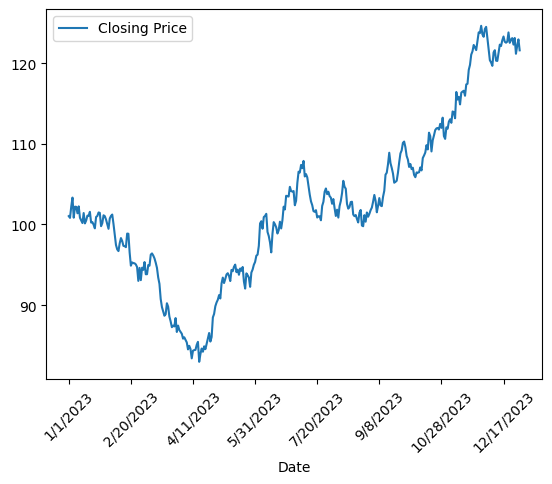

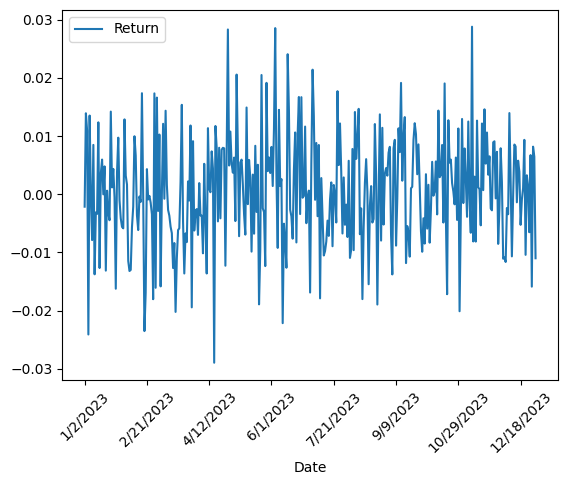

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# You should write your code here and print or plot the required data asked in homework documentation

# Returns for each day
dailyReturn = []
df = pd.read_csv("./data.csv")
for index,row in df.iterrows() :
    if index == 0 :
        continue
    retrn = (row["Closing Price"] - df.loc[ index - 1 , : ]["Closing Price"]) / df.loc[ index - 1 , : ]["Closing Price"]
    dailyReturn.append({"Date" : row["Date"], "Return" : retrn})
returns = pd.DataFrame(dailyReturn)

print("Daily Returns: ")
print(returns)
print()
# Returns' average
rValues = returns["Return"].to_numpy()
returnMean = np.average(rValues) 
print("Returns' Average:")
print(returnMean)
print()


# Standard Deviation:
stdDev = np.std(rValues)
print("Deviation: ")
print(stdDev)
print()

# Closing Price plot:
print("Closing Price plot")
df.plot(x="Date", y="Closing Price", rot=45)
print()

# Return Price plot:
print("Return Price plot")
returns.plot(x="Date", y="Return", rot=45)
print()



In [121]:
# max and min return Dates:
maxReturns = []
minReturns = []
maxVal = rValues.max()
minVal = rValues.min()
for index, row in returns.iterrows() :
    if row["Return"] == maxVal :
        maxReturns.append((row["Date"], row["Return"]))
    if row["Return"] == minVal :
        minReturns.append((row["Date"], row["Return"]))
print("Max Returns:")
for item in maxReturns :
    print(f"Date: {item[0]} \t Return value: {item[1]}")
print("Min Returns:")
for item in minReturns :
    print(f"Date: {item[0]} \t Return value: {item[1]}")

print("\n\n")

# max and min Close Price Dates and Values :
maxPrices = []
minPrices = []
prices = df["Closing Price"].to_numpy()
maxPrice = prices.max()
minPrice = prices.min()
for index, row in df.iterrows() :
    if row["Closing Price"] == maxPrice :
        maxPrices.append((row["Date"], row["Closing Price"]))
    if row["Closing Price"] == minPrice :
        minPrices.append((row["Date"], row["Closing Price"]))
print("Max Closing Price:")
for item in maxPrices :
    print(f"Date: {item[0]} \t Return value: {item[1]}")
print("Min Closing Price:")
for item in minPrices :
    print(f"Date: {item[0]} \t Return value: {item[1]}")

Max Returns:
Date: 11/9/2023 	 Return value: 0.02878633838810639
Min Returns:
Date: 4/16/2023 	 Return value: -0.028963574613605738



Max Closing Price:
Date: 11/29/2023 	 Return value: 124.6180108
Min Closing Price:
Date: 4/16/2023 	 Return value: 82.96821012


# Q6

In [134]:
def for_loop_feed_forward(X, w):
    """
    Perform a feed-forward operation using a for loop.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    outputs = np.zeros((X.shape[0], 1))

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            outputs[i] += X[i][j] * w[j]

    return outputs

def vectorized_feed_forward(X, w):
    """
    Perform a feed-forward operation using vectorization.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    outputs = np.matmul(X, w)

    return outputs

In [137]:
import time

# generate random samples

X = np.random.rand(1000, 500)
w = np.random.rand(500, 1)

start_time = time.time()
outputs = for_loop_feed_forward(X, w)
print("Time spent on calculating the outputs using for loops: ")
print(time.time() - start_time)

start_time = time.time()
outputs = vectorized_feed_forward(X, w)
print("Time spent on calculating the outputs using vectorization: ")
print(time.time() - start_time)

Time spent on calculating the outputs using for loops: 
1.163390874862671
Time spent on calculating the outputs using vectorization: 
0.0005562305450439453


# Q7

In [139]:
def replace_elements_above_threshold(array, threshold):
    """
    Replace elements in a NumPy array that are higher than the given threshold with a specified value.

    Parameters:
    - array (numpy.ndarray): Input NumPy array.
    - threshold (float): Threshold value to compare elements with.

    Returns:
    - numpy.ndarray: NumPy array with elements replaced above the threshold.
    """
    modified_arr = array > threshold

    return modified_arr

In [140]:
input_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold_value = 5
result_array = replace_elements_above_threshold(input_array, threshold_value)
print(result_array)

[[False False False]
 [False False  True]
 [ True  True  True]]


# Q8

In [171]:
class Matrix:
    def __init__(self, matrix):
        """
        Initialize a Matrix object with a given list of lists.

        Parameters:
        - matrix (list of lists): Input list of lists representing the matrix.
        """
        self.matrix = matrix
        self.shape = (len(matrix), len(matrix[0]))

    def is_equal(self, second_matrix):
        """
        Check if this Matrix object is equal to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if the matrices are equal, False otherwise.
        """
        if second_matrix.shape != self.shape :
            return False
        
        for i in range(self.shape[0]) :
            for j in range(self.shape[1]) :
                if self.matrix[i][j] != second_matrix.matrix[i][j] :
                    return False
        return True 
        

    def is_higher_elementwise(self, second_matrix):
        """
        Check if this Matrix object has higher values element-wise compared to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - Matrix: Matrix same shape of the input.
        """
        output = [ [0]*self.shape[1] for i in range(self.shape[0])]

        for i in range(self.shape[0]):
            for j in range(self.shape[1]):
                if self.matrix[i][j] > second_matrix.matrix[i][j] :
                    output[i][j] = True
                else :
                    output[i][j] = False
        return output
    
    def is_subset(self, second_matrix):
        """
        Check if this Matrix object is a subset of another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if this matrix is a subset of 'second_matrix', False otherwise.
        """

        return all(any(all(elem in l1 for elem in l2) for l1 in second_matrix.matrix) for l2 in self.matrix)

    def dot_product(self, second_matrix):
        """
        Calculate the dot product between this Matrix object and another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for the dot product.

        Returns:
        - Matrix: The result of the dot product as a numpy.ndarray.
        """
        output = [ [0]*second_matrix.shape[1] for i in range(self.shape[0])]
                
        for i in range(self.shape[0]):
            for j in range(second_matrix.shape[1]):
                for k in range(second_matrix.shape[0]):
                    output[i][j] += self.matrix[i][k] * second_matrix.matrix[k][j]
    
        return output


In [157]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])

# test equality of matrices here and show the result #
print(matrix1.is_equal(matrix2))

False


In [165]:
matrix3 = Matrix([[0, 0, 0], [10, 20, 30], [-1, 8, 10]])

# test proportion of matrices here and show the result #
print(matrix1.is_higher_elementwise(matrix3))


[[True, True, True], [False, False, False], [True, False, False]]


In [169]:
matrix4 = Matrix([[5, 6], [8, 9]])
matrix5 = Matrix([[1, 2], [4, 5]])
matrix6 = Matrix([[1, 2], [3, 4]])


# test subset of matrices here and show the result #
print(matrix4.is_subset(matrix1))
print(matrix5.is_subset(matrix1))
print(matrix6.is_subset(matrix1))

True
True
False


In [172]:
matrix7 = Matrix([[3, 1], [2, 4], [-1, 5]])
matrix8 = Matrix([[3, 1], [2, 4]])

# test product of matrices here and show the result #

matrix7.dot_product(matrix8)

[[11, 7], [14, 18], [7, 19]]